# Programming Project 1 analysis using EDA tools

### Import Modules

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [27]:
# Load the dataset and save it to a dataframe named 'df'
df=pd.read_csv('datatracking.csv')
df.head()

,Initials,Date,Course_ID,Time(m),Summary
0,PF,1/9/2023,BUSA 301-01,20,Discussion board
1,PF,1/9/2023,FINA 315-01,75,Chapter 1 HW
2,PF,1/10/2023,CHEM 117-01,10,News article summary
3,PF,1/12/2023,CHEM 117L-01,25,lab report
4,PF,1/14/2023,PHIL 301-ON2,60,watching lectures


### Investigate your dataset using pandas modules and do the tasks. At the end the dataframe will be look like: 
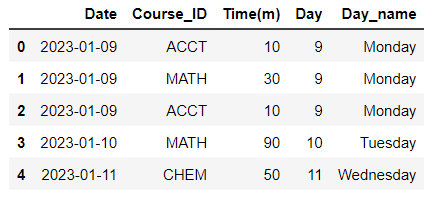

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Initials   22 non-null     object
 1   Date       22 non-null     object
 2   Course_ID  22 non-null     object
 3   Time(m)    22 non-null     int64 
 4   Summary    22 non-null     object
dtypes: int64(1), object(4)
memory usage: 1008.0+ bytes


In [29]:
# Is there any column you want to drop? If yes which column and why?
"There are no columns I want to drop because none are empty or missing data"

'There are no columns I want to drop because none are empty or missing data'

In [30]:
# Convert the date column to datetime

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Initials   22 non-null     object        
 1   Date       19 non-null     datetime64[ns]
 2   Course_ID  22 non-null     object        
 3   Time(m)    22 non-null     int64         
 4   Summary    22 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1008.0+ bytes


In [31]:
# Calculate the day of the month and create a new column named 'Day'
df['Day']=df['Date'].dt.day
df.head()

,Initials,Date,Course_ID,Time(m),Summary,Day
0,PF,2023-01-09,BUSA 301-01,20,Discussion board,9.0
1,PF,2023-01-09,FINA 315-01,75,Chapter 1 HW,9.0
2,PF,2023-01-10,CHEM 117-01,10,News article summary,10.0
3,PF,2023-01-12,CHEM 117L-01,25,lab report,12.0
4,PF,2023-01-14,PHIL 301-ON2,60,watching lectures,14.0


In [32]:
# Create a new column called Day_name using  .dt.day_name()
df['Day_name']= df['Date'].dt.day_name()
df.head()

,Initials,Date,Course_ID,Time(m),Summary,Day,Day_name
0,PF,2023-01-09,BUSA 301-01,20,Discussion board,9.0,Monday
1,PF,2023-01-09,FINA 315-01,75,Chapter 1 HW,9.0,Monday
2,PF,2023-01-10,CHEM 117-01,10,News article summary,10.0,Tuesday
3,PF,2023-01-12,CHEM 117L-01,25,lab report,12.0,Thursday
4,PF,2023-01-14,PHIL 301-ON2,60,watching lectures,14.0,Saturday


### Answer the questions

In [33]:
# What is the average time you have spend for learning?
print(df['Time(m)'].mean())

46.13636363636363


In [34]:
# Display all of the entries where you have spent more than the average time to learn 
df.loc[(df['Time(m)']>37.56)]

,Initials,Date,Course_ID,Time(m),Summary,Day,Day_name
1,PF,2023-01-09,FINA 315-01,75,Chapter 1 HW,9.0,Monday
4,PF,2023-01-14,PHIL 301-ON2,60,watching lectures,14.0,Saturday
6,PF,NaT,BUSA 301-01,60,Ch. 1 Powerpoint,NaN,NaN
8,PF,2023-01-18,PHIL 301-ON2,60,watching lectures,18.0,Wednesday
9,PF,2023-01-19,FINA 315-01,80,final project part 1,19.0,Thursday
13,PF,2023-01-29,HIST 117-ON1,120,Essay 1,29.0,Sunday
14,PF,NaT,FINA 315-01,40,study for test 1,NaN,NaN
16,PF,2023-02-05,FINA 315-01,45,Mindtap HW,5.0,Sunday
18,PF,2023-02-08,FINA 315-01,145,final project part 2,8.0,Wednesday
20,PF,2023-02-12,BUSA 301-01,45,study for test 1,12.0,Sunday


In [35]:
# Which course you have spent the maximum time to prepare?
df.groupby('Course_ID').sum()

,Time(m),Day
Course_ID,,
BUSA 301-01,160,56.0
CHEM 117-01,30,16.0
CHEM 117L-01,55,35.0
FINA 315-01,440,59.0
HIST 117-ON1,210,66.0
PHIL 301-ON2,120,32.0


### I spent the most time on my FINA 315-01 class

In [36]:
# Which day of the week you sepent most of the time?
most_time=df['Day_name'].mode()[0]
most_time

'Monday'

### Investigate the distribution of Time, adding the mean. How the data distributed?
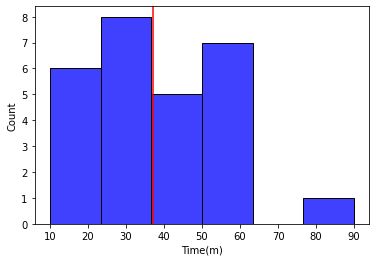

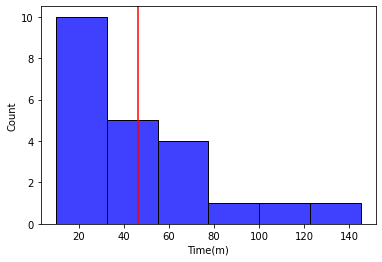

In [37]:
sns.histplot(x='Time(m)',data=df, color='blue')
mean=df['Time(m)'].mean()
plt.axvline(mean,color='red')
plt.show()

### The data is skewed right with my average time being just below 40 min

### Investigate Total time by Day using bar plot - Remove the Confidence Interval - By Course ID. Comment on your findings
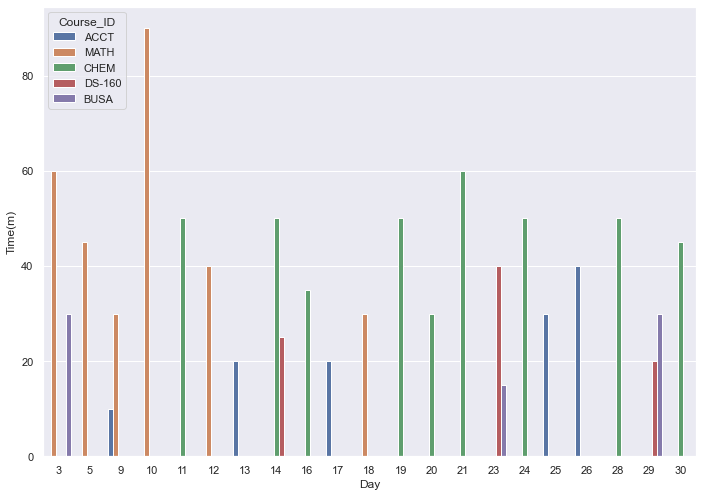

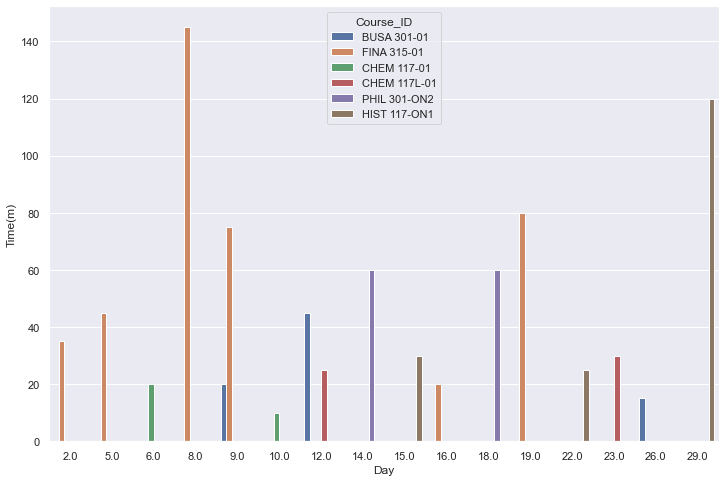

In [38]:
sns.set(rc={'figure.figsize':(12,8)})
bar_plot=sns.barplot(x='Day',y='Time(m)',data=df, ci=False, hue='Course_ID')

## The biggest period of time was spent on my Finance class, while I easily spent the least amount of time on my Chemistry class

### Investigate the measure of dispersion (table and plot) of time column.
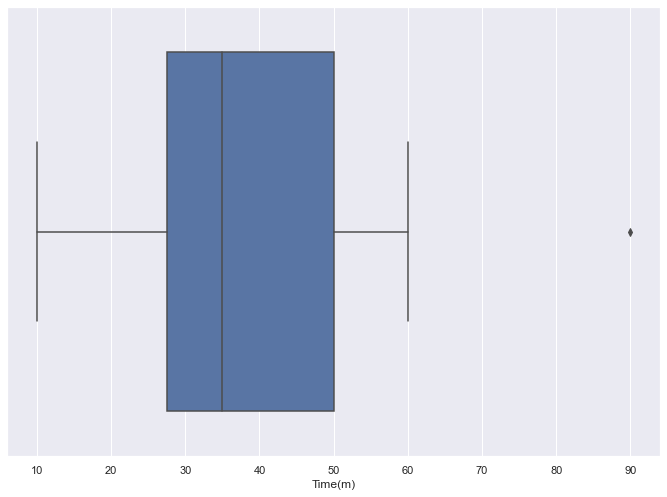

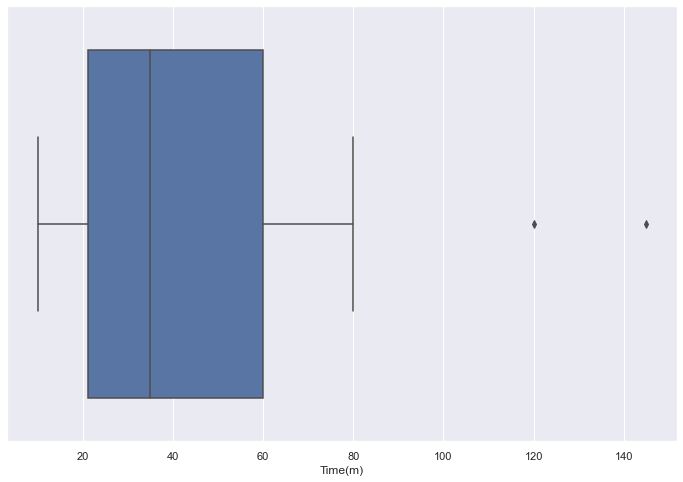

In [39]:
box_plot=sns.boxplot(x=df['Time(m)'])

## There are a few outliers at 120m and 145m but the normal range was between ~5-80 minutes

### Investigate the the distribution of time by Day_name
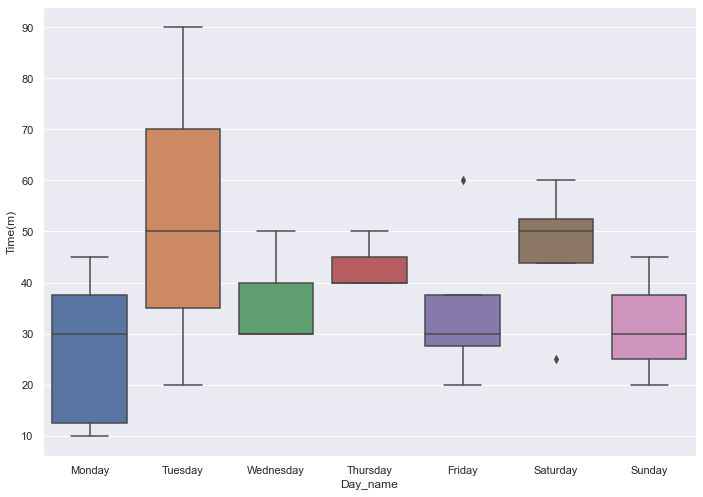

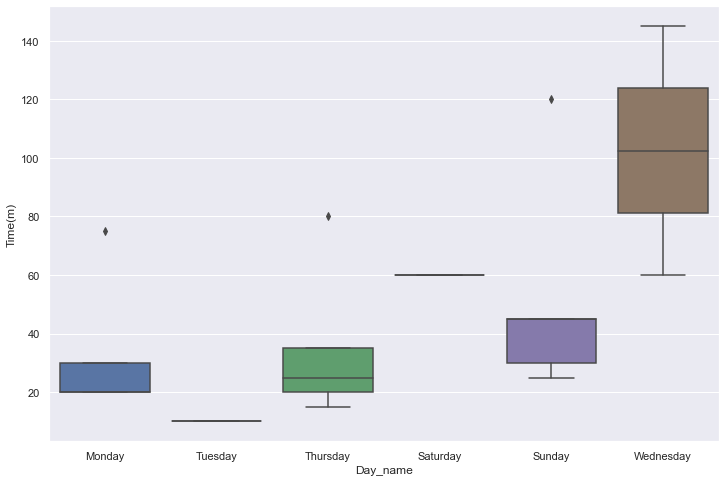

In [40]:
box_plot=sns.boxplot(x=df['Day_name'],y=df['Time(m)'])

### Use lmplots to plot Day and Time , remove error bar, add hue and display by column
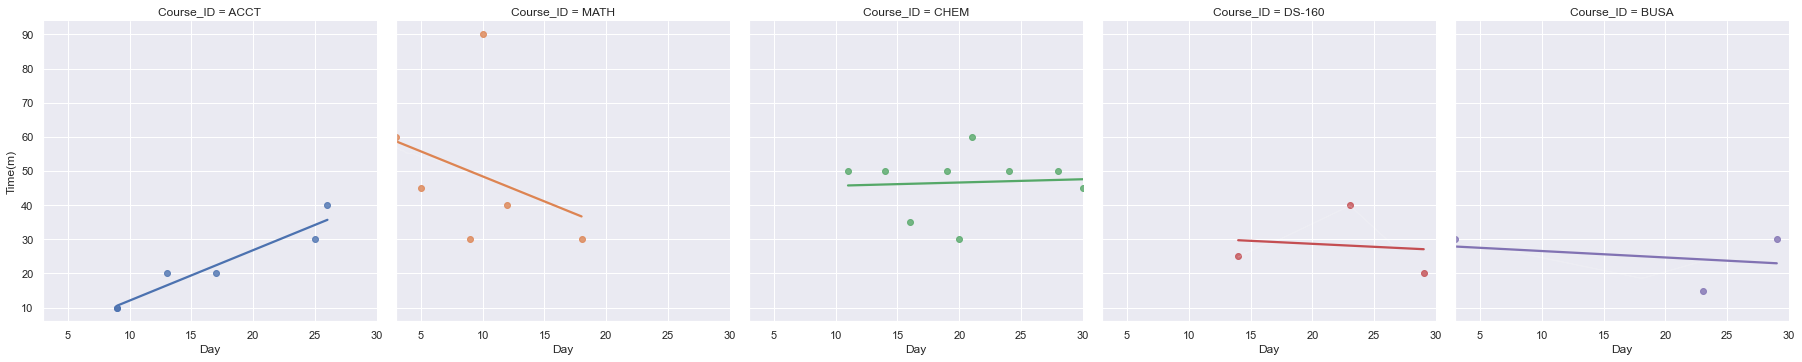

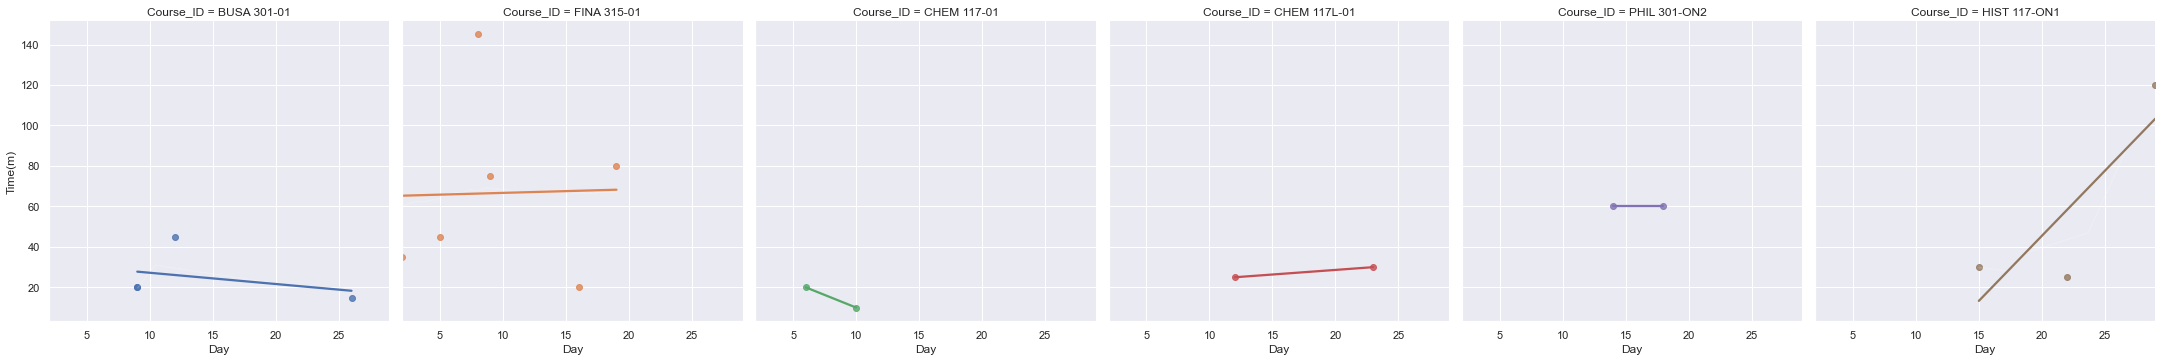

In [41]:
lmplot=sns.lmplot(x='Day', y='Time(m)',data=df, hue='Course_ID',ci=False,col='Course_ID')

### Create a pair plot of Day and Time and add course id as hue
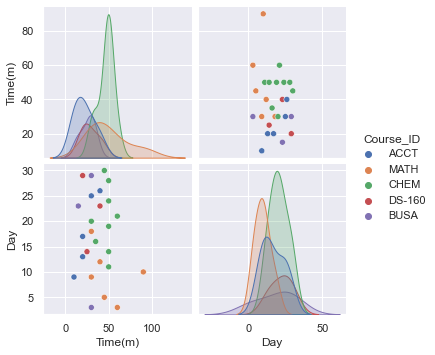

C:\Users\pfosn\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


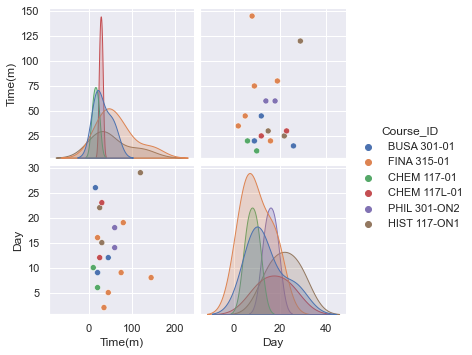

In [43]:
pair_plot=sns.pairplot(df,hue='Course_ID')

### Display the Heatmap and comment on your findings
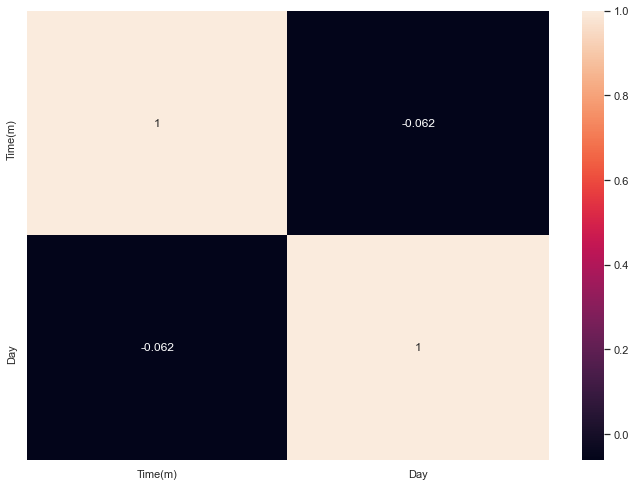

          Time(m)       Day
Time(m)  1.000000  0.131863
Day      0.131863  1.000000


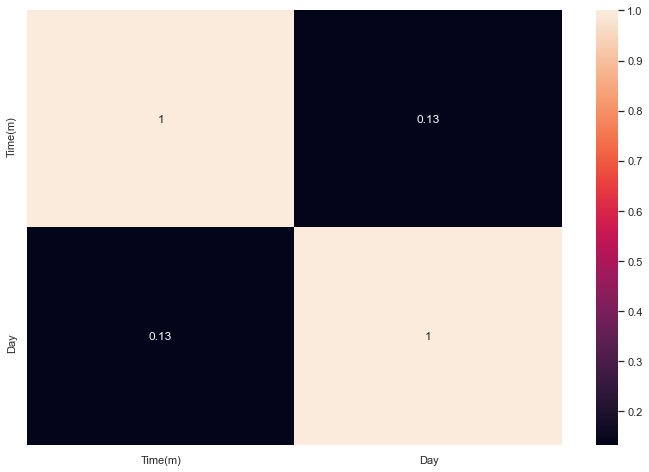

In [44]:
heat_map_corr=df[['Time(m)','Day']].corr(method='pearson')
print(heat_map_corr)
cols=['Time(m)','Day']
heat_map=sns.heatmap(heat_map_corr,annot=True,xticklabels=cols,yticklabels=cols)

## There was hardly any correlation between the time I spent on schoolwork and what day of the week it was, meaning the day of the week didn't have much of an effect on the amount of schoolwork I had to do.